In [4]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving CarPrice_Assignment.csv to CarPrice_Assignment.csv


# Regression of car prizes from car features
The goal is to come up with a predictive model for prices of cars based on different features of cars. We want to understand the factors on which the pricing of cars depends i.e. what factors affect the pricing of cars. The dataset can be downloaded from: 

https://www.kaggle.com/goyalshalini93/car-data

Data consists of both Categorical and Numerical Entries. We will only use the numerical entries for prediction for simplicity. You may (in the future) convert the categorical entries to numerical ones to improve prediction accuracy. The columns are the features of the car, including its price. You will regress the car price from the other features.

Several features of the homes are given in the attached spreadsheet. You will use the nuumerical features to make the prediction. The goal is to obtain good predictions using minimum number of predictors, which will improve interpretability.

In [5]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

import numpy as np
import pandas as pd


### Download the data
1. Drop rows with NAN entries
2. Scale the features
3. Add a constant feature; home prices often has a baseline. This can be omitted for the extra-credit part with mean subtraction


In [6]:
data = pd.read_csv("CarPrice_Assignment.csv")
data.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


## Preprocessing the data

Remove any NAN entries, extract the target field, and scale the data

In [7]:
# Keep only the numerical fields for convenience. Omit categorical fields
numerics = ['int16','int32','int64','float16','float32','float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]

# Drop training vectors with NAN entries
data.dropna(axis=0, how='any',inplace=True)

# Extract the target field
y = data['price'].to_numpy()

# Remove the target and ID fields from X
datanew = data.drop(['price'],axis=1)
X = datanew.to_numpy()
# Scale the data to make their variance one
X = scale(X,with_mean='False')

# Add a constant column to the features to account for baseline
n,m = X.shape
X0 = np.ones((n,1))
X = np.hstack((X,X0))

# Verify that sale price is eliminated
print('Size of Pre-processed data',X.shape)
datanew.head(3)

Size of Pre-processed data (205, 16)


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26


# Visualizing the data

We will load the variables to the matrix $\mathbf X$ and the prices to the vector $y$. We will seek to express the price vector $y$ as a weighted linear combination of the variables denoted by the columns of $\mathbf X$

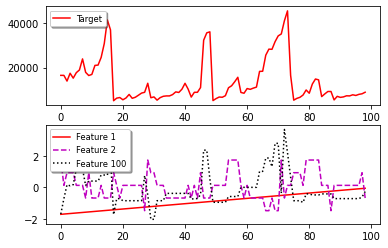

In [8]:
fig, ax = plt.subplots(2, 1)
c=ax[0].plot(y[1:100],'r',label='Target')
l = ax[0].legend(loc='upper left', shadow=True, fontsize='small')

c=ax[1].plot(X[1:100,0],'r',label='Feature 1')
c=ax[1].plot(X[1:100,1],'m--',label='Feature 2')
c=ax[1].plot(X[1:100,2],'k:',label='Feature 100')
legend = ax[1].legend(loc='upper left', shadow=True, fontsize='small')




## Split into training and validation datasets

Training dataset size (153,)
Test dataset size (52,)


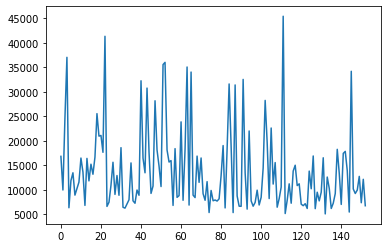

In [9]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=32)
print('Training dataset size',y_train.shape)
print('Test dataset size',y_test.shape)

s=plt.plot(y_train)


## 1.(a) Ridge Regression of car prices

We assume that the car prices (y) can be predicted as

$$y = a_0 x_0 + \ldots a_{9} x_{9}+.., $$

where $a_1,..a_{9},..$ are the coefficients and $x_0 .. x_9 ..$ are the home features. Specifically, we are trying to express the category vector as the weighted linear combination of the other curves. The weights are the factors. 

We first create the matrix X_train, whose columns are the normalized training features. We will solve for a using ridge regression as 

$$\mathbf a = \arg \min_{\mathbf a}\|\mathbf X\mathbf a - \mathbf y\|^2 + \alpha \|\mathbf a\|_2^2$$

WITHOUT using Scikit learn, construct the matrix X and compute the coefficients in for arbitrary choice of regularization parameter $\alpha$.



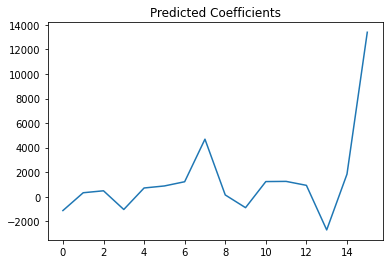

In [10]:

alpha = 0

# ADD CODE to compute the coefficients and prediction
coefficients = np.linalg.inv(X_train.T@X_train+alpha*np.eye(X_train.shape[1]))@X_train.T@y_train
plt.plot(coefficients)
s=plt.title('Predicted Coefficients')


## 1.(a) Prediction

Perform prediction and compare to the actual prices

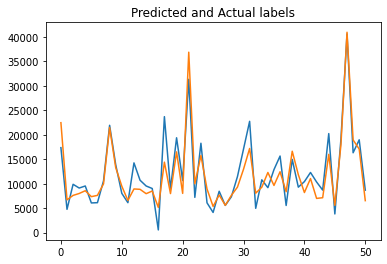

In [11]:
# MODIFY CODE BELOW
prediction = X_test@coefficients


fig = plt.figure()
ax = fig.gca()
plt.plot(prediction[1:100])

plt.plot(y_test[1:100])
s=plt.title('Predicted and Actual labels')


## 1.(b). Regularization parameter selection; ridge regression using scikit learn

We will now determinee the best regularization parameter, which would hopefully reduce the overfitting issue. We will now use ridge regression from Scikit learn for this purpose. See https://scikit-learn.org/stable/ for documentation. Specifically, the coefficients are learned from training data for different parameters, while the error on the validation data is used to determine the optimal parameter. By thresholding the coefficients, you will select the most significant and least significant predictors. This function also solves

$$\mathbf a = \arg \min_{\mathbf a}\|\mathbf X\mathbf a - \mathbf y\|^2 + \alpha \|\mathbf a\|_2^2$$

as with 1.(a).

We will store the coefficients, test error, and training error for a range of regularization parameters (denoted by alpha). Note that with $\lambda>0$, the coefficient values will be pushed closer to zero.

The plot of coefficients vs alpha will show when each of the coeffients become zero. Similarly, we can also observe the trend of the training and validation error

Text(0.5, 1.0, 'Ridge Regression Coefficients')

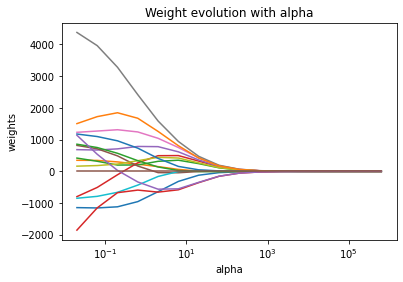

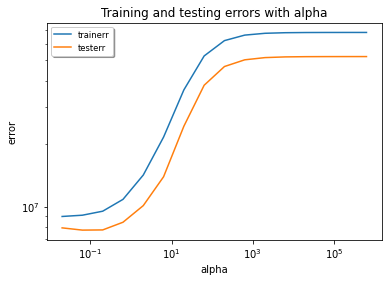

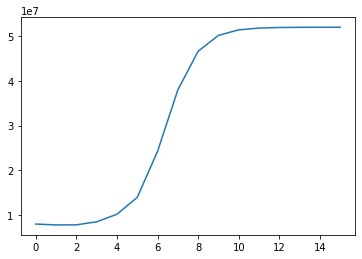

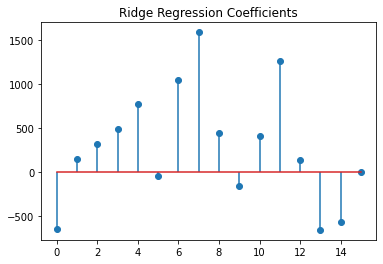

In [12]:
from sklearn.linear_model import Ridge
alphas = 10**np.arange(-2,6,0.5)
ridge = Ridge(max_iter = 10000, normalize = True)

coefs = []
testerr = []
trainerr = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    testerr.append(mean_squared_error(y_test, ridge.predict(X_test)))
    trainerr.append(mean_squared_error(y_train, ridge.predict(X_train)))

fig1 = plt.figure()
ax = fig1.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Weight evolution with alpha')

fig2 = plt.figure()
ax2 = fig2.gca()
ax2.plot(alphas*2, trainerr,label='trainerr')
ax2.plot(alphas*2, testerr,label='testerr')
ax2.set_xscale('log')
ax2.set_yscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('error')
legend = ax2.legend(loc='upper left', shadow=True, fontsize='small')
plt.title('Training and testing errors with alpha')


fig3 = plt.figure()
plt.plot(testerr)

# Plot the minimum point in the testing error
fig4 = plt.figure()
plt.stem(coefs[:][4],use_line_collection=True)
plt.title('Ridge Regression Coefficients')

## 1.c Pick important predictors; pick coefficients greater than a threshold
We will now list the important indices. We choose a threshold of 1000 in this case. You may play with this number. Put your money on these attributes. Likewise, we will insignificant coefficients are the less than a threshold

In [13]:
min_validation_error_index = 4
coeffsnew = coefs[min_validation_error_index][0:-1]

indices = np.nonzero(np.abs(coeffsnew)>1000)
names = datanew.columns
print('Significant Indices',names[indices])

indices = np.nonzero(np.abs(coeffsnew)<=1000)
names = datanew.columns
print('In Significant Indices',names[indices])


Significant Indices Index(['curbweight', 'enginesize', 'horsepower'], dtype='object')
In Significant Indices Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'boreratio', 'stroke', 'compressionratio', 'peakrpm',
       'citympg', 'highwaympg'],
      dtype='object')


## <font color = red> 1.d. To do: Lasso regression</font>

You will now use lasso regression from Scikit learn to regularize the estimation, which is another regularization strategy. See details in the course notes and documentation on  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
 Here, the cost function is specified by 

$$\mathbf a = \arg \min_{\mathbf a}\|\mathbf X\mathbf a - \mathbf y\|^2 + \alpha \|\mathbf a\|_{\ell_1}$$

Similar to the ridge regression setting, you will store the coefficients, test error, and training error for a range of regularization parameters (denoted by alpha). The plot of coefficients vs alpha will show when the coeffients become zero. Similarly, we can also observe the trend of the training and validation error.

We will store the coefficients, test error, and training error for a range of regularization parameters (denoted by alpha). Note that with $\lambda>0$, the coefficient values will be pushed closer to zero.

The plot of coefficients vs alpha will show when each of the coeffients become zero. Similarly, we can also observe the trend of the training and validation error

Text(0.5, 1.0, 'Lasso Regression Coefficients')

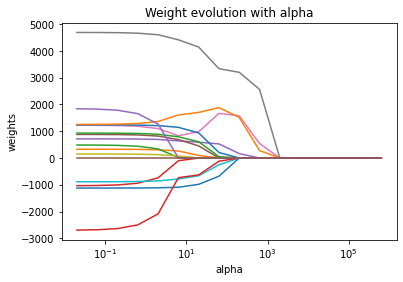

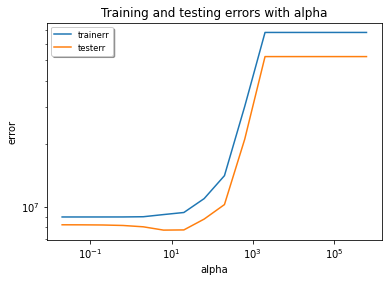

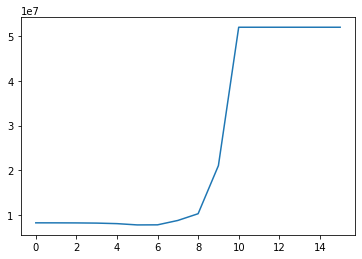

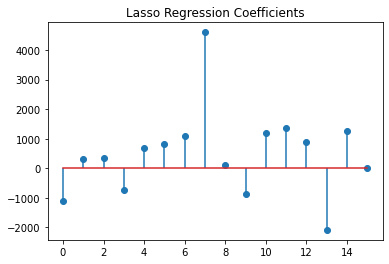

In [15]:
from sklearn.linear_model import Lasso

lassoreg = Lasso(max_iter = 10000, normalize = True)

coefs = []
testerr = []
trainerr = []

for a in alphas:
    lassoreg.set_params(alpha=a)
    lassoreg.fit(X_train, y_train)
    coefs.append(lassoreg.coef_)
    testerr.append(mean_squared_error(y_test, lassoreg.predict(X_test)))
    trainerr.append(mean_squared_error(y_train, lassoreg.predict(X_train)))

fig1 = plt.figure()
ax = fig1.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Weight evolution with alpha')

fig2 = plt.figure()
ax2 = fig2.gca()
ax2.plot(alphas*2, trainerr,label='trainerr')
ax2.plot(alphas*2, testerr,label='testerr')
ax2.set_xscale('log')
ax2.set_yscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('error')
legend = ax2.legend(loc='upper left', shadow=True, fontsize='small')
plt.title('Training and testing errors with alpha')


fig3 = plt.figure()
plt.plot(testerr)

# Plot the minimum point in the testing error
fig4 = plt.figure()
plt.stem(coefs[:][4],use_line_collection=True)
plt.title('Lasso Regression Coefficients')

## 1.e Pick important predictors; pick coefficients greater than a threshold
Note that the coeffients are sparse. We will now list the important indices. We choose a threshold of 1000 in this case. You may play with this number. Put your money on these attributes

In [16]:
min_validation_error_index = 4
coeffsnew = coefs[min_validation_error_index][0:-1]

indices = np.nonzero(np.abs(coeffsnew)>1000)
names = datanew.columns
print('Significant Indices',names[indices])

indices = np.nonzero(np.abs(coeffsnew)<=1000)
names = datanew.columns
print('In Significant Indices',names[indices])

Significant Indices Index(['car_ID', 'curbweight', 'enginesize', 'compressionratio', 'horsepower',
       'citympg', 'highwaympg'],
      dtype='object')
In Significant Indices Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'boreratio', 'stroke', 'peakrpm'],
      dtype='object')
